In [1]:
import pandas as pd
df=pd.read_csv('data.csv')
df.describe() #Basic statistical description of the data

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [2]:
df.isnull().sum() #checking if there are any null values

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [3]:
df['Calories'].fillna(df['Calories'].mean(),inplace=True)# replacing the null values with mean
df['Calories'].isnull().sum() #checking if null still exists

0

In [4]:
df.groupby(['Duration','Pulse']).agg({'Calories':['min','max','count','mean'],'Maxpulse':['min','max','count','mean']})
     

Calories                       Maxpulse                  
                    min     max count    mean      min  max count   mean
Duration Pulse                                                          
15       80        50.5    50.5     1    50.5      100  100     1  100.0
         124      124.2   124.2     1   124.2      139  139     1  139.0
20       83        50.3    50.3     1    50.3      107  107     1  107.0
         95        77.7    77.7     1    77.7      112  112     1  112.0
         106      110.4   110.4     1   110.4      136  136     1  136.0
...                 ...     ...   ...     ...      ...  ...   ...    ...
180      101      600.1   600.1     1   600.1      127  127     1  127.0
210      108     1376.0  1376.0     1  1376.0      160  160     1  160.0
         137     1860.4  1860.4     1  1860.4      184  184     1  184.0
270      100     1729.0  1729.0     1  1729.0      131  131     1  131.0
300      108     1500.2  1500.2     1  1500.2      143  143     1  143.0

[94 rows x 8 columns]

In [5]:
df[(df['Calories'].between(500,1000))]#calories between 500 and 1000 data

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [6]:
df_modified=df.loc[:,df.columns!='Maxpulse']
df_modified#df without maxpulse

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [7]:
df.drop('Maxpulse',axis=1) #deleting Maxpulse in the main df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [8]:

df['Calories']=df['Calories'].astype(int)#converting the data type to int
type(df['Calories'][0])

numpy.int32

<Axes: xlabel='Duration', ylabel='Calories'>

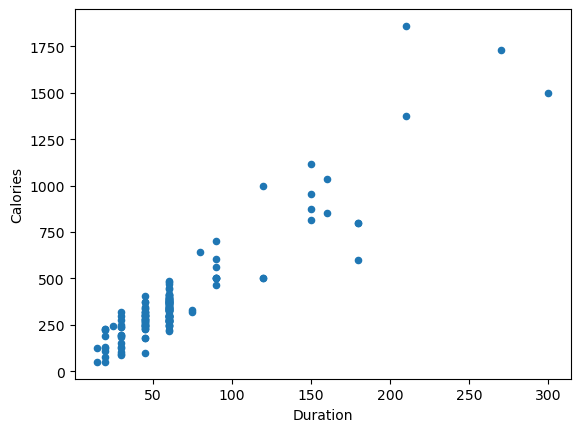

In [9]:
df.plot.scatter(x='Duration',y='Calories') #scatter plot
     